In [161]:
import h5py
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib import transforms

from scipy.optimize import curve_fit
from scipy import ndimage


fig_width_pt = 246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'legend.fontsize': 10,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'text.usetex': True,
          'figure.figsize': fig_size}
mpl.rcParams.update(params)

Keys: <KeysViewHDF5 ['Channels', 'Data', 'Instrument config', 'Instruments', 'Log list', 'Settings', 'Step config', 'Step list', 'Tags', 'Traces', 'Views']>
<KeysViewHDF5 ['Time stamp', 'VNA - S21', 'VNA - S21_N', 'VNA - S21_t0dt']>


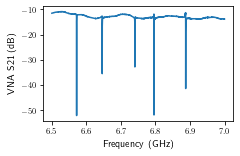

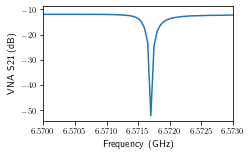

In [3]:
filename = "/Users/shahnawaz/Dropbox/phd/courses/Advanced measurement lab/QT/Group9/2_resonator_calib_vna_narrow_s21.hdf5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())

    # Get the data
    raw_data = {}
    for key in f.keys():
        raw_data[key] = list(f[key])

    print(f["Traces"].keys())
    arr = np.array(f["Traces"]['VNA - S21'])
    arr2 = np.array(f["Traces"]['VNA - S21_t0dt'])


f0, dt = arr2.ravel()
xvec = [f0]
for i in range(len(arr)-1):
    xvec.append(xvec[i] + dt)

xvec = np.array(xvec)
cp = (arr[:, 0] + 1j*arr[:, 1]).ravel()
ghz = 1e9

ghz = 1e9
plt.plot(xvec/ghz, 10*np.log(np.abs(cp)))
plt.ylabel("VNA S21 (dB)")
plt.xlabel("Frequency (GHz)")
plt.savefig("plots/fig-1-wide.pdf", bbox_inches="tight")
plt.show()

plt.plot(xvec/ghz, 10*np.log(np.abs(cp)))
plt.xlim(6.57, 6.573)
plt.ylabel("VNA S21 (dB)")
plt.xlabel("Frequency (GHz)")
plt.savefig("plots/fig-1-narrow.pdf", bbox_inches="tight")
plt.show()

In [113]:
filename = "/Users/shahnawaz/Dropbox/phd/courses/Advanced measurement lab/QT/Group9/3_resonator_calib_powersweep_2.hdf5"


with h5py.File(filename, "r") as f:
    print("Keys: %s" % f.keys())
    print(f["Traces"].keys())
    print(f["Data"].keys())
    arr = np.array(f["Traces"]['VNA - S21'])
    arr2 = np.array(f["Traces"]['VNA - S21_t0dt'])

f0, dt = arr2.ravel()
xvec = [f0]


for i in range(len(arr)-1):
    xvec.append(xvec[i] + dt)


xvec = np.array(xvec)
cp = (arr[:, 0] + 1j*arr[:, 1]).ravel()
ghz = 1e9

Keys: <KeysViewHDF5 ['Channels', 'Data', 'Instrument config', 'Instruments', 'Log list', 'Settings', 'Step config', 'Step list', 'Tags', 'Traces', 'Views']>
<KeysViewHDF5 ['Time stamp', 'VNA - S21', 'VNA - S21_N', 'VNA - S21_t0dt']>
<KeysViewHDF5 ['Channel names', 'Data', 'Time stamp']>


In [114]:
xvec = xvec/ghz

In [115]:
mag = np.abs(arr[:, 0, :] + 1j*arr[:, 1, :])

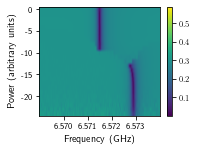

In [181]:
plt.figure(figsize=(12, 2))

rotated_img = ndimage.rotate(mag, 90)
pad_fraction = 0.5

im = plt.imshow(rotated_img, aspect='180')
plt.colorbar(im, pad = 0.01, fraction=pad_fraction)
plt.xticks([1000, 2000, 3000, 4000])
plt.gca().set_xticklabels(["{:.3f}".format(k) for k in [xvec[1000], xvec[2000], xvec[3000], xvec[4000]]])
plt.gca().set_yticks([0, 5, 10, 15, 20])
plt.gca().set_yticklabels([0, -5, -10, -15, -20])
plt.xlabel("Frequency (GHz)")
plt.ylabel("Power (arbitrary units)")
plt.savefig("plots/fig2-power.pdf", bbox_inches="tight")

# RB fits

In [143]:
filename = "/Users/shahnawaz/Dropbox/phd/courses/Advanced measurement lab/QT/Group9/11_RandomizedBenchmarking.hdf5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())

    # Get the data
    raw_data = {}
    for key in f.keys():
        raw_data[key] = list(f[key])

    print(list(f["Data"]["Channel names"]))
    arr = np.array(f["Data"]["Data"])
    # arr = np.array(f["Traces"]['VNA - S21'])
    # arr2 = np.array(f["Traces"]['VNA - S21_t0dt'])




Keys: <KeysViewHDF5 ['Channels', 'Data', 'Instrument config', 'Instruments', 'Log list', 'Settings', 'Step config', 'Step list', 'Tags', 'Views']>
[(b'logm', b''), (b'Pulses - Randomize', b''), (b'Pulses - Number of Cliffords', b''), (b'2QB Reduced Discrimination Q0Q1 - Population Qb2 0', b''), (b'2QB Reduced Discrimination Q0Q1 - Population Qb2 1', b'')]


In [148]:
num_cliff = arr[:, 2, :]
populations = arr[:, 3, :]

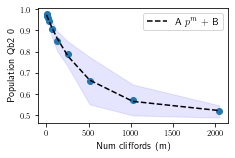

In [174]:
def func(m, A, p, B):
    return A*p**m + B


xdata, ydata = np.mean(num_cliff, axis=1), np.mean(populations, axis=1)
popt, pcov = curve_fit(func, xdata, ydata)


std = np.std(populations, axis=1)

plt.plot(xdata, ydata, "o")
plt.plot(xdata, func(xdata, *popt), "--", c="k", label=r"A $p^m$ + B")

plt.gca().fill_between(xdata, ydata - std,
               ydata + std, alpha=0.1,
                 color="blue")

plt.xlabel("Num cliffords (m)")
plt.ylabel("Population Qb2 0")
plt.legend()
plt.savefig("plots/figrb.pdf", bbox_inches="tight")

In [176]:
p = popt[1]

In [179]:
r = (1 - 1/2.)*(1 - p)

In [180]:
r/1.875

0.0005835861531604832

In [182]:
popt

array([0.45695597, 0.99781155, 0.51749961])

# Ramsey

In [187]:
filename = "/Users/shahnawaz/Dropbox/phd/courses/Advanced measurement lab/QT/Group9/7_ramsey_cal.hdf5"


with h5py.File(filename, "r") as f:
    print("Keys: %s" % f.keys())
    print(list(f["Channels"]))
    print(f["Data"].keys())
    arr = np.array(f["Data"]['Channel names'])

Keys: <KeysViewHDF5 ['Channels', 'Data', 'Instrument config', 'Instruments', 'Log list', 'Settings', 'Step config', 'Step list', 'Tags', 'Views']>


AttributeError: 'Dataset' object has no attribute 'keys'